In [1]:
pip install numpy==1.23.5

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/Users/krishnarana/Desktop/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
        File "/Users/krishnarana/Desktop/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/krishnarana/Desktop/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 137, in get_requires_for_build_wheel
          backend = _build_backend()
              

In [3]:


import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [4]:
# Step 1: Load the trained model
model = fasttext.load_model("model_amzn.bin")

In [5]:
with open("test.ft.txt", "r") as file:
    test_reviews = file.readlines()

In [9]:

# Step 1: Install Required Libraries
!pip install fasttext pandas matplotlib wordcloud

In [10]:
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import logging

In [12]:
# Step 3: Configure Logging (to avoid printing too much data)
logging.basicConfig(filename='debug.log', level=logging.INFO)

In [15]:
# Step 4: Train the FastText Model
try:
    # Train the FastText model
    model = fasttext.train_supervised(input="train.ft.txt")
    logging.info("Model trained successfully!")
    
    # Save the trained model
    model.save_model("model_amzn.bin")
    logging.info("Model saved as 'model_amzn.bin'.")
    
    # Test the model on the test dataset
    result = model.test("test.ft.txt")
    logging.info(f"Test Results: Precision = {result[1]}, Recall = {result[2]}")
except Exception as e:
    logging.error(f"Error during training or testing: {e}")

Read 289M words
Number of words:  5165173
Number of labels: 2
Progress: 100.0% words/sec/thread: 3012853 lr:  0.000000 avg.loss:  0.236755 ETA:   0h 0m 0s


In [16]:
# Step 5: Predict Sentiments for Test Data
try:
    # Load test data for predictions
    with open("test.ft.txt", "r") as file:
        test_reviews = file.readlines()
    
    # Predict sentiments for each review
    predictions = []
    for review in test_reviews:
        try:
            # Remove the label from the review text
            text = review.split(" ", 1)[1].strip()
            
            # Predict sentiment
            labels, probabilities = model.predict(text)  # Get the predicted label and probability
            label = labels[0]  # Extract the first label
            sentiment = label.replace("__label__", "").capitalize()  # Format the label
            predictions.append((text, sentiment))
        except ValueError as e:
            logging.warning(f"Error predicting sentiment for review: {text}")
            logging.warning(f"Error details: {e}")
            continue
    
    # Convert predictions to a DataFrame
    df = pd.DataFrame(predictions, columns=["Review", "Sentiment"])
    
    # Display the first few rows of the DataFrame (to avoid IOPub data rate issues)
    print(df.head())
    
    # Save the full DataFrame to a CSV file
    df.to_csv("sentiment_analysis_results.csv", index=False)
    logging.info("Full results saved to 'sentiment_analysis_results.csv'.")
except Exception as e:
    logging.error(f"Error during sentiment prediction: {e}")

Empty DataFrame
Columns: [Review, Sentiment]
Index: []


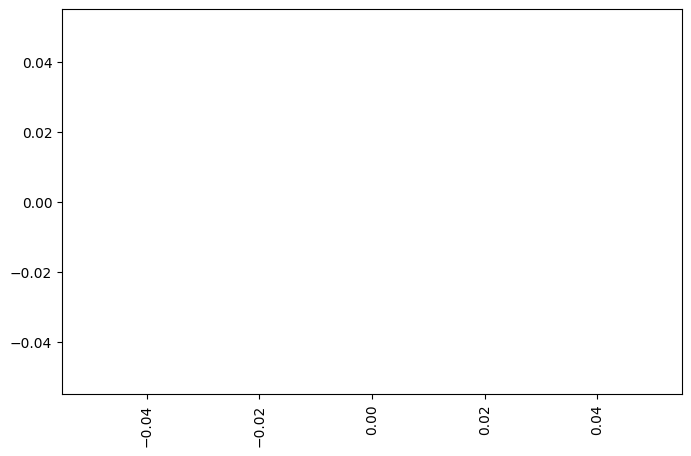

In [17]:
# Step 6: Visualize Sentiment Analysis Results
try:
    # Sentiment Distribution
    sentiment_counts = df["Sentiment"].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
    plt.title("Sentiment Analysis of Customer Reviews")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.show()
    
    # Word Cloud for Positive Reviews
    positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews")
    plt.show()
    
    # Word Cloud for Negative Reviews
    negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Negative Reviews")
    plt.show()
except Exception as e:
    logging.error(f"Error during visualization: {e}")


In [18]:
try:
    # Print insights based on sentiment distribution
    print("Insights:")
    print(f"- Positive Reviews: {sentiment_counts.get('Positive', 0)}")
    print(f"- Negative Reviews: {sentiment_counts.get('Negative', 0)}")
    print(f"- Neutral Reviews: {sentiment_counts.get('Neutral', 0)}")
    
    # Example actionable insights
    if sentiment_counts.get("Positive", 0) > sentiment_counts.get("Negative", 0):
        print("Most customers are satisfied with the product/service.")
    else:
        print("There are significant concerns that need to be addressed.")
except Exception as e:
    logging.error(f"Error generating insights: {e}")

Insights:
- Positive Reviews: 0
- Negative Reviews: 0
- Neutral Reviews: 0
There are significant concerns that need to be addressed.


Read 289M words
Number of words:  5165173
Number of labels: 2
Progress: 100.0% words/sec/thread: 2938515 lr:  0.000000 avg.loss:  0.236737 ETA:   0h 0m 0s 87.5% words/sec/thread: 3075618 lr:  0.012499 avg.loss:  0.240641 ETA:   0h 0m 8s


Empty DataFrame
Columns: [Review, Sentiment]
Index: []
Insights:
- Positive Reviews: 0
- Negative Reviews: 0
- Neutral Reviews: 0
There are significant concerns that need to be addressed.


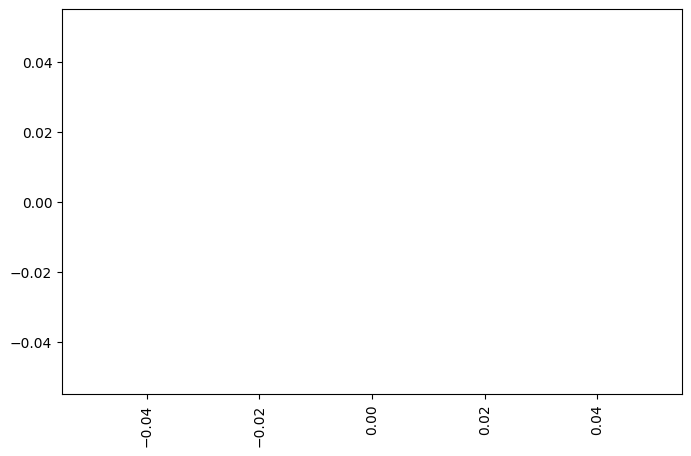

In [19]:
# Step 1: Install Required Libraries
!pip install fasttext pandas matplotlib wordcloud

# Step 2: Import Libraries
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import logging

# Step 3: Configure Logging (to avoid printing too much data)
logging.basicConfig(filename='debug.log', level=logging.INFO)

# Step 4: Train the FastText Model
try:
    # Train the FastText model
    model = fasttext.train_supervised(input="train.ft.txt")
    logging.info("Model trained successfully!")
    
    # Save the trained model
    model.save_model("model_amzn.bin")
    logging.info("Model saved as 'model_amzn.bin'.")
    
    # Test the model on the test dataset
    result = model.test("test.ft.txt")
    logging.info(f"Test Results: Precision = {result[1]}, Recall = {result[2]}")
except Exception as e:
    logging.error(f"Error during training or testing: {e}")

# Step 5: Predict Sentiments for Test Data
try:
    # Load test data for predictions
    with open("test.ft.txt", "r") as file:
        test_reviews = file.readlines()
    
    # Predict sentiments for each review
    predictions = []
    for review in test_reviews:
        try:
            # Remove the label from the review text
            text = review.split(" ", 1)[1].strip()
            
            # Predict sentiment
            labels, probabilities = model.predict(text)  # Get the predicted label and probability
            label = labels[0]  # Extract the first label
            sentiment = label.replace("__label__", "").capitalize()  # Format the label
            predictions.append((text, sentiment))
        except ValueError as e:
            logging.warning(f"Error predicting sentiment for review: {text}")
            logging.warning(f"Error details: {e}")
            continue
    
    # Convert predictions to a DataFrame
    df = pd.DataFrame(predictions, columns=["Review", "Sentiment"])
    
    # Display the first few rows of the DataFrame (to avoid IOPub data rate issues)
    print(df.head())
    
    # Save the full DataFrame to a CSV file
    df.to_csv("sentiment_analysis_results.csv", index=False)
    logging.info("Full results saved to 'sentiment_analysis_results.csv'.")
except Exception as e:
    logging.error(f"Error during sentiment prediction: {e}")

# Step 6: Visualize Sentiment Analysis Results
try:
    # Sentiment Distribution
    sentiment_counts = df["Sentiment"].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
    plt.title("Sentiment Analysis of Customer Reviews")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.show()
    
    # Word Cloud for Positive Reviews
    positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews")
    plt.show()
    
    # Word Cloud for Negative Reviews
    negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Negative Reviews")
    plt.show()
except Exception as e:
    logging.error(f"Error during visualization: {e}")

# Step 7: Generate Insights
try:
    # Print insights based on sentiment distribution
    print("Insights:")
    print(f"- Positive Reviews: {sentiment_counts.get('Positive', 0)}")
    print(f"- Negative Reviews: {sentiment_counts.get('Negative', 0)}")
    print(f"- Neutral Reviews: {sentiment_counts.get('Neutral', 0)}")
    
    # Example actionable insights
    if sentiment_counts.get("Positive", 0) > sentiment_counts.get("Negative", 0):
        print("Most customers are satisfied with the product/service.")
    else:
        print("There are significant concerns that need to be addressed.")
except Exception as e:
    logging.error(f"Error generating insights: {e}")

In [6]:
# Step 3: Predict sentiments for each review
predictions = []
for review in test_reviews:
    # Remove the label from the review text
    text = review.split(" ", 1)[1].strip()
    # Predict sentiment
    try:
        labels, probabilities = model.predict(text)  # Get the predicted label and probability
        label = labels[0]  # Extract the first label
        sentiment = label.replace("__label__", "").capitalize()  # Format the label
        predictions.append((text, sentiment))
    except ValueError as e:
        print(f"Error predicting sentiment for review: {text}")
        print(f"Error details: {e}")
        continue

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

